In [121]:
import pandas as pd

data_path = "C:/Source/AI och Maskinlära 2024 YH/statistiska_metoder/ALL CSV FILES - 2nd Edition/"

adv = pd.read_csv(data_path+"Advertising.csv", index_col=0)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [122]:
import numpy as np
# Y is a respones variable
Y = sales = adv["sales"]
# Antag att regressionen av "TV" på "sales" är ungefär linjär
# Y = ß0 + ß1 X
# sales = 1 * ß0 + "TV" * ß1
# Modellspecifikationsmatrisen (designmatrisen) beöver en 1:a i första kolumnen
X = TV = np.column_stack([np.ones(Y.shape[0]), adv["TV"]])
X


array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

$$
\widehat{B} = b = (X^TX)^{-1} X^Ty.
$$


In [123]:
# pseudo-invers för prestanda
b = np.linalg.pinv(X.T @ X) @ X.T @ Y
b

array([7.03259355, 0.04753664])

Efter regression får vi en skattare för \( y \):

$$
\hat{y} = \beta_0 + \beta_1 x
$$

Modellen är alltså:

$$
\hat{y} = 7.0325 + 0.0475x
$$

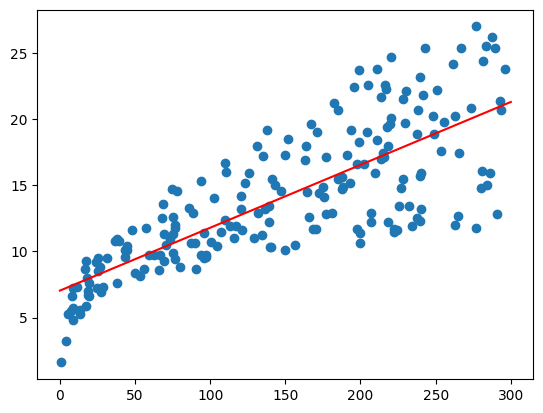

In [124]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], Y)
x = np.linspace(0, 300)
y_hat = b[0] + b[1]*x
plt.plot(x, y_hat, c="red")

SSE = (y1 - ß0 - ß1 x1)^2 + (y^2 - ß0 - ß1 x2 )^2 + . . . + (yn - ß0 - ß1 xn )^2

In [125]:
# RSS Residual Sum of Squares
# SSE Sum of Square Errors
# Samma sak!
# stickprovets strolek
n = Y.shape[0]
# antalet parametrar, bara TV . detta fall, så 1
v = X.shape[1] - 1

SSE = np.sum(np.square(Y - (X @ b)))

print(np.column_stack([Y, X]))


[[ 22.1   1.  230.1]
 [ 10.4   1.   44.5]
 [  9.3   1.   17.2]
 [ 18.5   1.  151.5]
 [ 12.9   1.  180.8]
 [  7.2   1.    8.7]
 [ 11.8   1.   57.5]
 [ 13.2   1.  120.2]
 [  4.8   1.    8.6]
 [ 10.6   1.  199.8]
 [  8.6   1.   66.1]
 [ 17.4   1.  214.7]
 [  9.2   1.   23.8]
 [  9.7   1.   97.5]
 [ 19.    1.  204.1]
 [ 22.4   1.  195.4]
 [ 12.5   1.   67.8]
 [ 24.4   1.  281.4]
 [ 11.3   1.   69.2]
 [ 14.6   1.  147.3]
 [ 18.    1.  218.4]
 [ 12.5   1.  237.4]
 [  5.6   1.   13.2]
 [ 15.5   1.  228.3]
 [  9.7   1.   62.3]
 [ 12.    1.  262.9]
 [ 15.    1.  142.9]
 [ 15.9   1.  240.1]
 [ 18.9   1.  248.8]
 [ 10.5   1.   70.6]
 [ 21.4   1.  292.9]
 [ 11.9   1.  112.9]
 [  9.6   1.   97.2]
 [ 17.4   1.  265.6]
 [  9.5   1.   95.7]
 [ 12.8   1.  290.7]
 [ 25.4   1.  266.9]
 [ 14.7   1.   74.7]
 [ 10.1   1.   43.1]
 [ 21.5   1.  228. ]
 [ 16.6   1.  202.5]
 [ 17.1   1.  177. ]
 [ 20.7   1.  293.6]
 [ 12.9   1.  206.9]
 [  8.5   1.   25.1]
 [ 14.9   1.  175.1]
 [ 10.6   1.   89.7]
 [ 23.2   1. 

$\texttt {Cov}(X, Y) = E[(X - \mu_X) (Y - \mu_Y)] = E[XY]= E[X]E[Y]$

$S_{xy} \rightarrow \sum{(X - \mu_X)(Y - \mu_Y)}$

Om X och Y är oberoende så är Cov(X, Y) = 0, men vi kan inte anta det omvända. Dvs Cov=0 betyder inte nödvändigtvis att X och Y är oberoende, men de är åtminstone inte linjärt beroende.

En starkare egenskap är korrelation (Pearson coefficient of correlation), som är ett värde mellan -1 och 1 (inklusive ändpunkterna).

Låt $X$ ocvh $Y$ vara slumpvariabler med medel $\mu_x$ respektive $\mu_Y$ samt varianser $\sigma_X^2$ och $\sigma_Y^2$.
Korrelationen melland $X$ och $Y$ ges då av:
\begin{equation*}
\rho_{XY} = \frac{\texttt{Cov}(X, Y)}{\sqrt{\texttt{(VarX)}\,\texttt{(VarY)}}} 
\end{equation*}

Om Pearsonkoefficienten är 1 eller -1 ($|\rho_{XY}| = 1$) då har vi visat att det finns en ekvation:
$Y = \beta_0 + \beta_1X$

Standarfel (kring medles):
\begin{equation}
\frac{\sigma^2}{n}
\end{equation}

In [126]:
X.shape, Y.shape

((200, 2), (200,))

In [127]:
var = SSE/(n-v-1)

S = np.sqrt(var) # residual standard error, alltså en uppskattning av standardfelet/ stickprovsavvikelsen
# Sum of squares Regression
SSR = np.sum(b* (X.T @ Y)) - (np.square(np.sum(Y))/n)
Syy = (n*np.sum(np.square(Y)) - np.square(np.sum(Y)))/n
Sxx = (n*np.sum(np.square(X)) - np.square(np.sum(X)))/n

Sxy = (n*np.sum(X[:, 1]@Y) - (np.sum(X[:, 1])*np.sum(Y)))/n

# Standard error (of the mean)
se = var / n

# square of standard error of β1 = var/Sxx
se_b = var/Sxx

ci = (b[1], 2*np.sqrt(se_b))
print(f"Confidence interval on predictor β1: {ci[0]:.4f} ± {ci[1]:.4f} interval: [{ci[0] - ci[1]:.3f}, {ci[0] + ci[1]:.3f}]")


Confidence interval on predictor β1: 0.0475 ± 0.0055 interval: [0.042, 0.053]


Detta är väldigt ungefärligt ett 90% interval (<2σ). Om vi kör regressionen många gånger på delmängder av datan (som skall ha samma medel, dvs vara balanserade) så väntar vi oss att 90% av värdena hamnar mellan 0.053 och 0.042.

In [128]:
x_mean = np.mean(X)
se_intercept = var * ((1/n) + (np.square(x_mean)/Sxx))
np.sqrt(se_intercept)

0.30727303071635115

In [129]:
ci = (b[0], 2*np.sqrt(se_intercept))
print(f"Confidence interval on predictor ß0: {ci[0]:.3f} ± {ci[1]:.3f} interval: [{b[0]- ci[1]:.3f}, {b[0] + ci[1]:.3f}]")

Confidence interval on predictor ß0: 7.033 ± 0.615 interval: [6.418, 7.647]


In [130]:
# borde bli [6.130, 7.935]
b[0]

7.032593549127828

### Hypotestestning
Noll_hypotes:

$H_0$ : There is no relationship between X and Y

Alternativ hypotes:

$H_a$ : There is a relationship between X and Y

$H_o$ : β1 = 0

$H_a$ : β1 ≠ 0

T-statistika för att testa relevans
\begin{equation*}
t = \frac{\hat{\beta}_1 - \mathbb{0}}{SE(\hat{\beta}_1)}
\end{equation*}






In [131]:
t = b[1]/np.sqrt(se_b)
t
# t => antalet standard deviationer bort ett värde 0 för ß1 skulle vara om t=2 är det alltså 95% chans att det är korrekt. Ett värde på 17 (dvs 17σ) motsvarar ett tal med 42 nolloer efter decimalpunkter

17.309780472029264

Ok, så regressionen är relevant, men hur bra är den?

\begin{equation*}
\hat{\rho} = r = \frac{S_{xy}}{\sqrt{S_{xx}\, S_{yy}}}
\end{equation*}

In [132]:
import scipy.stats as stats
rho = Sxy / (np.sqrt(Sxx*Syy))
Rsq = SSR/Syy
r = stats.pearsonr(X[:, 1], Y)
print(f"scipy.stats pearsonnr objekt: {r}")
print(f"scipy.stats korrelation: {r.correlation}\nsqrt(R²):\t\t {np.sqrt(Rsq)}\nR²:\t\t\t {Rsq}\nAlternativ R²: \t\t {1 - (SSE/Syy)}\nr²: {np.square(r.correlation)}\nBeräkning av r och R² i flera steg: {rho} och r² = {np.square(rho)}")

scipy.stats pearsonnr objekt: PearsonRResult(statistic=0.7822244248616067, pvalue=1.4673897001946062e-42)
scipy.stats korrelation: 0.7822244248616067
sqrt(R²):		 0.7822244248616106
R²:			 0.6118750508500775
Alternativ R²: 		 0.6118750508500712
r²: 0.6118750508500714
Beräkning av r och R² i flera steg: 0.7983953520754693 och r² = 0.6374351382157126


Multipel linjär regression
Mikro.y(x1,x2,x3) = b0 + b1x1 + b2x2 + b3x3
Y = X1b + E

där X är modellspecifikation matrisen. E är vektorn med stokatiska fel med avseende på väntevärdet och Y är en respons vektor för Y över hela stickprovet. 

In [133]:
import pandas as pd

data_path = "C:/Source/AI och Maskinlära 2024 YH/statistiska_metoder/ALL CSV FILES - 2nd Edition/"

adv = pd.read_csv(data_path+"Advertising.csv", index_col=0)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [134]:
import numpy as np
Y = adv["sales"]
X = np.column_stack([np.ones(Y.shape[0]), adv["TV"], adv["radio"], adv["newspaper"]])
X

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

ß_hat = (X^T X)^-1 X^T Y

n Sum i = 1 [yi - (b0 + b1x1i + ... + bkxki)]^2


In [135]:
b = np.linalg.pinv(X.T @ X) @ X.T @ Y
k = len(b)-1
n = Y.shape[0]
SSE = np.sum(np.square(Y - (X @ b)))
var = SSE/(n - k -1)
S = np.sqrt(var)
Syy = (n*np.sum(np.square(Y)) - np.square(np.sum(Y)))/n
SSR = Syy - SSE
# SSE = Syy - SSR
SSR2 = (n*np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))))/n
SSR, SSR2

(4860.323487097813, 4860.323487097845)

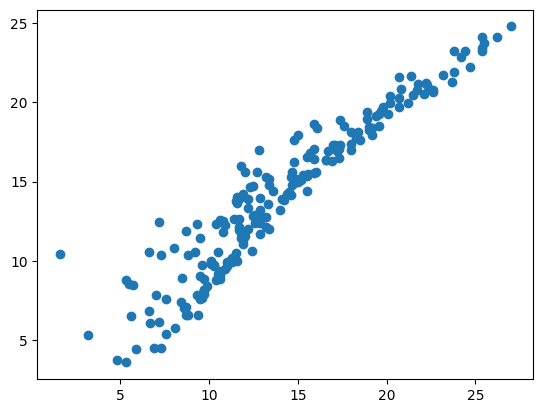

In [136]:
import matplotlib.pyplot as plt

plt.scatter(Y, X @ b)

In [137]:
Rsq = SSR/Syy

Rsq
# Choose 90 % as confidence level.


0.8972106381789521

In [138]:
import scipy.stats as stats
# H0: all ß = 0
sig_statistic = (SSR/k)/S
p_significance = stats.f.sf(sig_statistic, k, n - k - 1)
p_significance
# We reject the null-hypothesis, regression IS significant

6.373276981801425e-117

Variance/Co-variance matrix:
c = (X^T X)^-1 \ sigma^2

In [139]:
c = np.linalg.pinv(X.T@X)*var

# H0: b3 is irrelevant, b3 = 0
b3_statistic = b[3] / (S*np.sqrt(c[3, 3]))
p_b3 = 2*min(stats.t.cdf(b3_statistic, n-k-1), stats.t.sf(b3_statistic, n-k-1))
p_b3

0.9166073083091348